In [1]:
from sympy import symbols,sqrt,exp,diff,sinh,coth,simplify,factor,solve_poly_system, solve,collect,lambdify

In [2]:
R1, R2, s1, s2, V, Vprime, epsilon, m, mb, r = symbols("R_1 R_2 \sigma_1 \sigma_2 V V' \epsilon m_{\gamma'} \pmb{m} r")
b3, b4, c4, b1, b2, c3 = symbols("b_3 b_4 c_4 b_1 b_2 c_3")

In [3]:
def DeltaDiff(fabove,fbelow,point):
    return (diff(fabove,r)-diff(fbelow,r)).subs(r,point)

In [4]:
def laplacian(f):
    return diff(diff(f,r),r) + (2/r)*diff(f,r)

# 1. Finding V' in terms of $\sigma_1$ and $\sigma_2$ using derivative discontinuity

## General Solution of V'

The expression for dark photon in inner space, bulk, and outside are given by a generic expression with 4 constants b1 to b4.

In [5]:
Vprimein = b1*2*sinh(m*r)/(m*r)
Vprimein

2*b_1*sinh(m_{\gamma'}*r)/(m_{\gamma'}*r)

In [6]:
Vprime = b3*exp(mb*r)/(mb*r)+b4*exp(-mb*r)/r
Vprime

b_4*exp(-\pmb{m}*r)/r + b_3*exp(\pmb{m}*r)/(\pmb{m}*r)

In [7]:
Vprimeout = b2*exp(-m*r)/(m*r)
Vprimeout

b_2*exp(-m_{\gamma'}*r)/(m_{\gamma'}*r)

We know from before, by continuity, value of b1 and b2 in terms of b3 and b4.

In [8]:
b1_express = (m/(2*sinh(m*R1)))*(b3*exp(mb*R1)/mb + b4*exp(-mb*R1))
b1_express

m_{\gamma'}*(b_4*exp(-R_1*\pmb{m}) + b_3*exp(R_1*\pmb{m})/\pmb{m})/(2*sinh(R_1*m_{\gamma'}))

In [9]:
b2_express = m*exp(m*R2)*(b3*exp(mb*R2)/mb+b4*exp(-mb*R2))
b2_express

m_{\gamma'}*(b_4*exp(-R_2*\pmb{m}) + b_3*exp(R_2*\pmb{m})/\pmb{m})*exp(R_2*m_{\gamma'})

We check that the reduced equation of motion are satisfied.

In [10]:
simplify(laplacian(Vprimein) - m**2*Vprimein) 

0

In [11]:
simplify(laplacian(Vprime)-mb**2*Vprime)

0

In [12]:
simplify(laplacian(Vprimeout) - m**2*Vprimeout)

0

We also check the continuity of V'

In [13]:
simplify(Vprime.subs([(r,R1),(b1,b1_express)]) - Vprimein.subs([(r,R1),(b1,b1_express)]))

0

In [14]:
simplify(Vprimeout.subs([(r,R2),(b2,b2_express)]) - Vprime.subs([(r,R2),(b2,b2_express)]))

0

## Applying discontinuity at $R_1$

We apply $\Delta \frac{dV'}{dr}(R1) = - \epsilon \sigma_1$

In [15]:
DeltaDiff(Vprime,Vprimein,R1)

-\pmb{m}*b_4*exp(-R_1*\pmb{m})/R_1 - 2*b_1*cosh(R_1*m_{\gamma'})/R_1 + b_3*exp(R_1*\pmb{m})/R_1 + 2*b_1*sinh(R_1*m_{\gamma'})/(R_1**2*m_{\gamma'}) - b_4*exp(-R_1*\pmb{m})/R_1**2 - b_3*exp(R_1*\pmb{m})/(R_1**2*\pmb{m})

The above expression is equal to $-\epsilon \sigma_1$. So we note that the below expression (equation 1) is zero

In [16]:
equation1 = DeltaDiff(Vprime,Vprimein,R1)+epsilon*s1
equation1

\epsilon*\sigma_1 - \pmb{m}*b_4*exp(-R_1*\pmb{m})/R_1 - 2*b_1*cosh(R_1*m_{\gamma'})/R_1 + b_3*exp(R_1*\pmb{m})/R_1 + 2*b_1*sinh(R_1*m_{\gamma'})/(R_1**2*m_{\gamma'}) - b_4*exp(-R_1*\pmb{m})/R_1**2 - b_3*exp(R_1*\pmb{m})/(R_1**2*\pmb{m})

We might as well substitude b1 to get everything in terms of b3 and b4.

In [17]:
equation1 = simplify(equation1.subs(b1,b1_express))
equation1

\epsilon*\sigma_1 - \pmb{m}*b_4*exp(-R_1*\pmb{m})/R_1 + b_3*exp(R_1*\pmb{m})/R_1 - b_4*m_{\gamma'}*exp(-R_1*\pmb{m})/(R_1*tanh(R_1*m_{\gamma'})) - b_3*m_{\gamma'}*exp(R_1*\pmb{m})/(R_1*\pmb{m}*tanh(R_1*m_{\gamma'}))

## Applying discontinuity at $R_2$

In [18]:
DeltaDiff(Vprimeout,Vprime,R2)

\pmb{m}*b_4*exp(-R_2*\pmb{m})/R_2 - b_2*exp(-R_2*m_{\gamma'})/R_2 - b_3*exp(R_2*\pmb{m})/R_2 - b_2*exp(-R_2*m_{\gamma'})/(R_2**2*m_{\gamma'}) + b_4*exp(-R_2*\pmb{m})/R_2**2 + b_3*exp(R_2*\pmb{m})/(R_2**2*\pmb{m})

The above expression is equal to $-\epsilon \sigma_2$. So we note that the below expression (equation 2) is zero

In [19]:
equation2 = DeltaDiff(Vprimeout,Vprime,R2)+epsilon*s2
equation2

\epsilon*\sigma_2 + \pmb{m}*b_4*exp(-R_2*\pmb{m})/R_2 - b_2*exp(-R_2*m_{\gamma'})/R_2 - b_3*exp(R_2*\pmb{m})/R_2 - b_2*exp(-R_2*m_{\gamma'})/(R_2**2*m_{\gamma'}) + b_4*exp(-R_2*\pmb{m})/R_2**2 + b_3*exp(R_2*\pmb{m})/(R_2**2*\pmb{m})

Substituting b2 to get everything in terms of b3 and b4

In [20]:
equation2 = simplify(equation2.subs(b2,b2_express))
equation2

\epsilon*\sigma_2 + \pmb{m}*b_4*exp(-R_2*\pmb{m})/R_2 - b_3*exp(R_2*\pmb{m})/R_2 - b_4*m_{\gamma'}*exp(-R_2*\pmb{m})/R_2 - b_3*m_{\gamma'}*exp(R_2*\pmb{m})/(R_2*\pmb{m})

## Solving for $b_3$ and $b_4$

I want to solve equation 1 and equation 2 for b3 and b4 in terms of $\sigma_1$ and $\sigma_2$.

In [21]:
solution = solve_poly_system([equation1,equation2],b3,b4)

In [22]:
solution

[(\epsilon*\pmb{m}*(R_1*\pmb{m}*\sigma_1*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_1*\sigma_1*m_{\gamma'}*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*m_{\gamma'}*exp(R_2*\pmb{m}))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m})),
  \epsilon*(R_1*\pmb{m}*\sigma_1*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_1*\sigma_1*m_{\gamma'}*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_2*\sigma_2*m_{\gamma'}*exp(R_1*\pmb{m}))*exp(\pmb{m}*(R_1 + R_2))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*t

Since there is only one solution, this is a list of length 1

In [23]:
solution = solution[0]

In [24]:
solution

(\epsilon*\pmb{m}*(R_1*\pmb{m}*\sigma_1*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_1*\sigma_1*m_{\gamma'}*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*m_{\gamma'}*exp(R_2*\pmb{m}))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m})),
 \epsilon*(R_1*\pmb{m}*\sigma_1*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_1*\sigma_1*m_{\gamma'}*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_2*\sigma_2*m_{\gamma'}*exp(R_1*\pmb{m}))*exp(\pmb{m}*(R_1 + R_2))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tan

So the solution for b3 is

In [25]:
b3_express = simplify(solution[0])
b3_express

\epsilon*\pmb{m}*(R_1*\pmb{m}*\sigma_1*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_1*\sigma_1*m_{\gamma'}*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*m_{\gamma'}*exp(R_2*\pmb{m}))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

Factoring out $\sigma_1$ and $\sigma_2$

In [26]:
b3_express = simplify(b3_express.factor(s1,s2))
b3_express

\epsilon*\pmb{m}*(R_1*\sigma_1*(\pmb{m} - m_{\gamma'})*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*(\pmb{m}*tanh(R_1*m_{\gamma'}) + m_{\gamma'})*exp(R_2*\pmb{m}))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

In [27]:
b4_express = simplify(solution[1])
b4_express

\epsilon*(R_1*\pmb{m}*\sigma_1*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_1*\sigma_1*m_{\gamma'}*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\pmb{m}*\sigma_2*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_2*\sigma_2*m_{\gamma'}*exp(R_1*\pmb{m}))*exp(\pmb{m}*(R_1 + R_2))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

In [28]:
b4_express = simplify(b4_express.factor(s1,s2))
b4_express

\epsilon*(R_1*\sigma_1*(\pmb{m} + m_{\gamma'})*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*(\pmb{m}*tanh(R_1*m_{\gamma'}) - m_{\gamma'})*exp(R_1*\pmb{m}))*exp(\pmb{m}*(R_1 + R_2))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

Check the 2 equations are solved.

In [29]:
simplify(equation1.subs([(b3,b3_express),(b4,b4_express)]))

0

In [30]:
simplify(equation2.subs([(b3,b3_express),(b4,b4_express)]))

0

In [31]:
simplify(DeltaDiff(Vprime,Vprimein,R1).subs([(b1,b1_express),(b3,b3_express),(b4,b4_express)]))

-\epsilon*\sigma_1

In [32]:
simplify(DeltaDiff(Vprimeout,Vprime,R2).subs([(b2,b2_express),(b3,b3_express),(b4,b4_express)]))

-\epsilon*\sigma_2

# 2. Finding V in terms of $\sigma_1$ and $\sigma_2$ using derivative discontinuity

## General solution of V

The general form of V is given by

In [33]:
Vin = -epsilon*b3*exp(mb*R1)/(mb*R1) - epsilon*b4*exp(-mb*R1)/R1 + c4 + c3/R1
Vin

c_4 - \epsilon*b_4*exp(-R_1*\pmb{m})/R_1 - \epsilon*b_3*exp(R_1*\pmb{m})/(R_1*\pmb{m}) + c_3/R_1

In [34]:
V = -epsilon*b3*exp(mb*r)/(mb*r) - epsilon*b4*exp(-mb*r)/r+c4 + c3/r
V

-\epsilon*b_4*exp(-\pmb{m}*r)/r - \epsilon*b_3*exp(\pmb{m}*r)/(\pmb{m}*r) + c_3/r + c_4

In [35]:
Vout = (-epsilon*b3*exp(mb*R2)/mb - epsilon*b4*exp(-mb*R2) + c4*R2 + c3)/r
Vout

(R_2*c_4 - \epsilon*b_4*exp(-R_2*\pmb{m}) - \epsilon*b_3*exp(R_2*\pmb{m})/\pmb{m} + c_3)/r

We check that the reduced equation of motions are satisfied.

In [36]:
simplify(laplacian(Vin))

0

In [37]:
simplify(laplacian(V)+epsilon*mb**2*Vprime)

0

In [38]:
simplify(laplacian(Vout))

0

We also check V is continuous

In [39]:
simplify(V.subs(r,R1) - Vin.subs(r,R1))

0

In [40]:
simplify(Vout.subs(r,R2) - V.subs(r,R2))

0

## Apply Conductor Equation to Eliminate $c_3$

The below equation must be 0 by conductor equation.

In [41]:
conductor_equation = simplify(diff(V,r) + epsilon*diff(Vprime,r))
conductor_equation

-c_3/r**2

This implies $c_3 = 0$. Hence, we modify the general solution of V to:

In [42]:
Vin = Vin.subs(c3,0)
Vin

c_4 - \epsilon*b_4*exp(-R_1*\pmb{m})/R_1 - \epsilon*b_3*exp(R_1*\pmb{m})/(R_1*\pmb{m})

In [43]:
V = V.subs(c3,0)
V

-\epsilon*b_4*exp(-\pmb{m}*r)/r - \epsilon*b_3*exp(\pmb{m}*r)/(\pmb{m}*r) + c_4

In [44]:
Vout = Vout.subs(c3,0)
Vout

(R_2*c_4 - \epsilon*b_4*exp(-R_2*\pmb{m}) - \epsilon*b_3*exp(R_2*\pmb{m})/\pmb{m})/r

## Applying Discontinuity at R1 to Solve for $\sigma_1$ in terms of $\sigma_2$

Physically, there can only be one parameter describing the charge. We can solve for $\sigma_1$ by applying discontinuity of V at R1:
$$ \Delta \frac{dV}{dr} = - \sigma $$

In [45]:
deltaVR1=simplify(DeltaDiff(V,Vin,R1))
deltaVR1

\epsilon*(R_1*\pmb{m}**2*b_4 - R_1*\pmb{m}*b_3*exp(2*R_1*\pmb{m}) + \pmb{m}*b_4 + b_3*exp(2*R_1*\pmb{m}))*exp(-R_1*\pmb{m})/(R_1**2*\pmb{m})

So the following equation must be 0

In [46]:
equation3 = simplify(deltaVR1 + s1)
equation3

\sigma_1 + \epsilon*\pmb{m}*b_4*exp(-R_1*\pmb{m})/R_1 - \epsilon*b_3*exp(R_1*\pmb{m})/R_1 + \epsilon*b_4*exp(-R_1*\pmb{m})/R_1**2 + \epsilon*b_3*exp(R_1*\pmb{m})/(R_1**2*\pmb{m})

We can directly solve for $b_3$ in terms of $b_4$

In [47]:
b3_express_in_b4 = simplify(solve(equation3,b3)[0])
b3_express_in_b4

\pmb{m}*(R_1**2*\sigma_1*exp(R_1*\pmb{m}) + R_1*\epsilon*\pmb{m}*b_4 + \epsilon*b_4)*exp(-2*R_1*\pmb{m})/(\epsilon*(R_1*\pmb{m} - 1))

We can also substitute our original expressions for b3 and b4 in terms of $\sigma_1$ and $\sigma_2$ into equation 3, so that we can solve for $\sigma_1$ in terms of $\sigma_2$. In other words, this discontinuity shows us that $\sigma_1$ is given by $\sigma_2$.

In [48]:
equation3 = equation3.subs([(b3,b3_express),(b4,b4_express)])

In [49]:
s1_express = simplify(solve(equation3,s1)[0])
s1_express

2*R_2*\epsilon**2*\pmb{m}*\sigma_2*(R_1*m_{\gamma'}*exp(2*R_1*m_{\gamma'}) + R_1*m_{\gamma'} - exp(2*R_1*m_{\gamma'}) + 1)*exp(\pmb{m}*(R_1 + R_2))/(R_1*(R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*\pmb{m}) - R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\epsilon**2*\pmb{m}**2*exp(2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) - R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) + R_1*\pmb{m}**2*exp(2*R_1*\pmb{m}) - R_1*\pmb{m}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\pmb{m}**2*exp(2*R_2*\pmb{m}) + R_1*\pmb{m}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) + 2*R_1*\pmb{m}*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'})) + 2*R_1*\pmb{m}*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) - R_1*m_{\gamma'}**2*exp(2*R_1*\pmb{m}) - R_1*

As an important consistency check, we see that $\sigma_1 \propto \epsilon^2 \sigma_2$, which is small. Also, this formula for $\sigma_1$ is the same as what we got if we kept $c_3$ and set it to 0 later.

We check that this discontinuity is ineeded satisfied. We do this by supposing we solved for $\sigma_2$ instead, and see if the discontinuity gives us back $-\sigma_1$.

In [50]:
s2_express = simplify(solve(equation3,s2)[0])
s2_express

R_1*\sigma_1*(R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*\pmb{m}) - R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\epsilon**2*\pmb{m}**2*exp(2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) - R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) + R_1*\pmb{m}**2*exp(2*R_1*\pmb{m}) - R_1*\pmb{m}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) - R_1*\pmb{m}**2*exp(2*R_2*\pmb{m}) + R_1*\pmb{m}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) + 2*R_1*\pmb{m}*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'})) + 2*R_1*\pmb{m}*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) - R_1*m_{\gamma'}**2*exp(2*R_1*\pmb{m}) - R_1*m_{\gamma'}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) + R_1*m_{\gamma'}**2*exp(2*R_2*\pmb{m}) + R_1*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'} + 2*R_2

In [51]:
test_result = simplify(DeltaDiff(V,Vin,R1).subs([(b3,b3_express),(b4,b4_express),(s2,s2_express)]))
test_result

\sigma_1*(-R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*\pmb{m}) - R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'}))*tanh(R_1*m_{\gamma'}) + R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*(\pmb{m} + m_{\gamma'})) + R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) - R_1*\epsilon**2*\pmb{m}**2*m_{\gamma'}*exp(2*R_1*m_{\gamma'} + 2*R_2*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + R_1*\epsilon**2*\pmb{m}*m_{\gamma'}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'}))*tanh(R_1*m_{\gamma'}) - R_1*\epsilon**2*\pmb{m}*m_{\gamma'}**2*exp(2*R_1*(\pmb{m} + m_{\gamma'})) + R_1*\epsilon**2*\pmb{m}*m_{\gamma

Obviously, we want this to give us -$\sigma_1$. But the algorithm is too studpid to realize this. Let's try putting in some number.

In [52]:
test_result.subs([(mb,m/sqrt(1+epsilon**2)),(R1,1),(R2,2),(m,0.1),(epsilon,0.1)])

-1.0*\sigma_1

## Solving for $c_4$ in terms of $b_3$ and $b_4$ using derivative discontinuity

Using the "cute" argument, $\Delta \frac{dV}{dr} = \frac{1}{\epsilon} \Delta \frac{dV'}{dr}$,
the following equation should be 0

In [53]:
deltaVR2=simplify(DeltaDiff(Vout,V,R2))
deltaVprimeR2 = simplify(DeltaDiff(Vprimeout,Vprime,R2).subs(b2,b2_express))

In [54]:
equation4 = deltaVR2 - deltaVprimeR2/epsilon
equation4

-\epsilon*\pmb{m}*b_4*exp(-R_2*\pmb{m})/R_2 + \epsilon*b_3*exp(R_2*\pmb{m})/R_2 - c_4/R_2 - (\pmb{m}**2*b_4 - \pmb{m}*b_3*exp(2*R_2*\pmb{m}) - \pmb{m}*b_4*m_{\gamma'} - b_3*m_{\gamma'}*exp(2*R_2*\pmb{m}))*exp(-R_2*\pmb{m})/(R_2*\epsilon*\pmb{m})

In [55]:
c4_express = simplify(solve(equation4,c4)[0])
c4_express

(-\epsilon**2*\pmb{m}**2*b_4 + \epsilon**2*\pmb{m}*b_3*exp(2*R_2*\pmb{m}) + \pmb{m}*b_3*exp(2*R_2*\pmb{m}) - \pmb{m}*b_4*(\pmb{m} - m_{\gamma'}) + b_3*m_{\gamma'}*exp(2*R_2*\pmb{m}))*exp(-R_2*\pmb{m})/(\epsilon*\pmb{m})

In [56]:
c4_express.factor(b3,b4)

(b_3*(\epsilon**2*\pmb{m}*exp(2*R_2*\pmb{m}) + \pmb{m}*exp(2*R_2*\pmb{m}) + m_{\gamma'}*exp(2*R_2*\pmb{m})) + b_4*(-\epsilon**2*\pmb{m}**2 - \pmb{m}**2 + \pmb{m}*m_{\gamma'}))*exp(-R_2*\pmb{m})/(\epsilon*\pmb{m})

We check that equation 4 (i.e. discontinuity of V at R2) is satisfied

In [57]:
simplify(equation4.subs(c4,c4_express))

0

In [58]:
simplify(DeltaDiff(Vout,V,R2).subs([(c4,c4_express),(b3,b3_express),(b4,b4_express)]))

-\sigma_2

Since we ultimately know what $b_3$ and $b_4$ are in terms of $\sigma_1$ and $\sigma_2$, and also $\sigma_1$ in terms of $\sigma_2$, we have solved $V$ and $V'$ in terms of only the input parameter $\sigma_2$.

# 3. Converting to numpy function

## Converting all constants to numpy function

We need to replace the reduced mass with its expression in terms of original mass everywhere.

In [59]:
mb_express = m/sqrt(1+epsilon**2)
mb_express

m_{\gamma'}/sqrt(\epsilon**2 + 1)

We replace the reduced mass in sigma1 first

In [60]:
s1_express = s1_express.subs(mb,mb_express)
s1_express

2*R_2*\epsilon**2*\sigma_2*m_{\gamma'}*(R_1*m_{\gamma'}*exp(2*R_1*m_{\gamma'}) + R_1*m_{\gamma'} - exp(2*R_1*m_{\gamma'}) + 1)*exp(m_{\gamma'}*(R_1 + R_2)/sqrt(\epsilon**2 + 1))/(R_1*sqrt(\epsilon**2 + 1)*(-R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*(m_{\gamma'} + m_{\gamma'}/sqrt(\epsilon**2 + 1)))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*(m_{\gamma'} + m_{\gamma'}/sqrt(\epsilon**2 + 1)))/sqrt(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'}/sqrt(\epsilon**2 + 1))/sqrt(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/sqrt(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'} + 2*

We substitute sigma1 and reduced mass into b4 and convert it into a function in terms of fundamental variables.

In [61]:
b4_express

\epsilon*(R_1*\sigma_1*(\pmb{m} + m_{\gamma'})*exp(R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*(\pmb{m}*tanh(R_1*m_{\gamma'}) - m_{\gamma'})*exp(R_1*\pmb{m}))*exp(\pmb{m}*(R_1 + R_2))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

In [62]:
b4_express = b4_express.subs([(mb,mb_express),(s1,s1_express)])
b4_func = lambdify((epsilon,m,R1,R2,s2),b4_express)

In [63]:
b4_func(0.1,0.1,1,2,1) #test

-0.8229574589665556

we repeat the same thing to lambdify b3

In [64]:
b3_express

\epsilon*\pmb{m}*(R_1*\sigma_1*(\pmb{m} - m_{\gamma'})*exp(R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + R_2*\sigma_2*(\pmb{m}*tanh(R_1*m_{\gamma'}) + m_{\gamma'})*exp(R_2*\pmb{m}))/(-\pmb{m}**2*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}**2*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_1*\pmb{m}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m})*tanh(R_1*m_{\gamma'}) + \pmb{m}*m_{\gamma'}*exp(2*R_2*\pmb{m}) - m_{\gamma'}**2*exp(2*R_1*\pmb{m}) + m_{\gamma'}**2*exp(2*R_2*\pmb{m}))

In [65]:
b3_express = b3_express.subs([(mb,mb_express),(s1,s1_express)])
b3_func = lambdify((epsilon,m,R1,R2,s2), b3_express)

In [66]:
b3_func(0.1,0.1,1,2,1)

0.08188732811874447

we next lambidfy b2

In [67]:
b2_express

m_{\gamma'}*(b_4*exp(-R_2*\pmb{m}) + b_3*exp(R_2*\pmb{m})/\pmb{m})*exp(R_2*m_{\gamma'})

In [68]:
b2_express = b2_express.subs([(mb,mb_express),(b3,b3_express),(b4,b4_express)])
b2_func = lambdify((epsilon,m,R1,R2,s2), b2_express)

In [69]:
b2_func(0.1,0.1,1,2,1)

0.04027155950107219

next, lambdify b1

In [70]:
b1_express

m_{\gamma'}*(b_4*exp(-R_1*\pmb{m}) + b_3*exp(R_1*\pmb{m})/\pmb{m})/(2*sinh(R_1*m_{\gamma'}))

In [71]:
b1_express = b1_express.subs([(mb,mb_express),(b3,b3_express),(b4,b4_express)])
b1_func = lambdify((epsilon,m,R1,R2,s2), b1_express)

In [72]:
b1_func(0.1,0.1,1,2,1)

0.08188597936386484

we next lambify c4

In [73]:
c4_express

(-\epsilon**2*\pmb{m}**2*b_4 + \epsilon**2*\pmb{m}*b_3*exp(2*R_2*\pmb{m}) + \pmb{m}*b_3*exp(2*R_2*\pmb{m}) - \pmb{m}*b_4*(\pmb{m} - m_{\gamma'}) + b_3*m_{\gamma'}*exp(2*R_2*\pmb{m}))*exp(-R_2*\pmb{m})/(\epsilon*\pmb{m})

In [74]:
c4_express = c4_express.subs([(mb,mb_express),(b3,b3_express),(b4,b4_express)])
c4_func = lambdify((epsilon,m,R1,R2,s2), c4_express)

In [75]:
s1_express

2*R_2*\epsilon**2*\sigma_2*m_{\gamma'}*(R_1*m_{\gamma'}*exp(2*R_1*m_{\gamma'}) + R_1*m_{\gamma'} - exp(2*R_1*m_{\gamma'}) + 1)*exp(m_{\gamma'}*(R_1 + R_2)/sqrt(\epsilon**2 + 1))/(R_1*sqrt(\epsilon**2 + 1)*(-R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*(m_{\gamma'} + m_{\gamma'}/sqrt(\epsilon**2 + 1)))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'} + 2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*(m_{\gamma'} + m_{\gamma'}/sqrt(\epsilon**2 + 1)))/sqrt(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'}/sqrt(\epsilon**2 + 1))/sqrt(\epsilon**2 + 1) - R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_2*m_{\gamma'}/sqrt(\epsilon**2 + 1))/sqrt(\epsilon**2 + 1) + R_1*\epsilon**2*m_{\gamma'}**2*exp(2*R_1*m_{\gamma'} + 2*

In [76]:
s1_func = lambdify((epsilon,m,R1,R2,s2), s1_express)

check that $\sigma_1 << \sigma_2$ when $\sigma_2=1$

In [77]:
s1_func(0.1,0.1,1,2,1)

5.4104220853888206e-05

## Converting V' to function

we now start lambdifying various pieces of V'

In [78]:
Vprimein

2*b_1*sinh(m_{\gamma'}*r)/(m_{\gamma'}*r)

In [79]:
Vprimein = Vprimein.subs(b1,b1_express)
Vprimein_func = lambdify((r,epsilon,m,R1,R2,s2),Vprimein)

In [80]:
Vprimein_func(0.5,0.1,0.1,1,2,1)

0.16384020557416348

In [81]:
Vprime

b_4*exp(-\pmb{m}*r)/r + b_3*exp(\pmb{m}*r)/(\pmb{m}*r)

In [82]:
Vprime=Vprime.subs([(b3,b3_express),(b4,b4_express),(mb,mb_express)])
Vprime_func = lambdify((r,epsilon,m,R1,R2,s2),Vprime)

In [83]:
Vprime_func(0.5,0.1,0.1,1,2,1)

0.16384223520059682

In [84]:
Vprimeout

b_2*exp(-m_{\gamma'}*r)/(m_{\gamma'}*r)

In [85]:
Vprimeout=Vprimeout.subs([(b2,b2_express),(mb,mb_express)])
Vprimeout_func = lambdify((r,epsilon,m,R1,R2,s2),Vprimeout)

In [86]:
Vprimeout_func(2,0.1,0.1,1,2,1)

0.16485782118968795

In [87]:
Vprime_func(2,0.1,0.1,1,2,1)

0.16485782118968795

In [88]:
Vprimeout_func(3,0.1,0.1,1,2,1)

0.0994463501788741

In [89]:
def Vprime_combine_func(r,epsilon,m,R1,R2,s2):
    if r<R1:
        return Vprimein_func(r,epsilon,m,R1,R2,s2)
    elif R1<=r<=R2:
        return Vprime_func(r,epsilon,m,R1,R2,s2)
    else:
        return Vprimeout_func(r,epsilon,m,R1,R2,s2)

I wrote the comparison of r and R1 to be pointwise. Need to vectorize this function later.

check that the combined function reproduces the various pieces.

In [90]:
Vprime_combine_func(3,0.1,0.1,1,2,1) - Vprimeout_func(3,0.1,0.1,1,2,1)

0.0

In [91]:
Vprime_combine_func(0.5,0.1,0.1,1,2,1) - Vprimein_func(0.5,0.1,0.1,1,2,1)

0.0

In [92]:
Vprime_combine_func(1.5,0.1,0.1,1,2,1) - Vprime_func(1.5,0.1,0.1,1,2,1)

0.0

## Converting V to function

In [93]:
Vin

c_4 - \epsilon*b_4*exp(-R_1*\pmb{m})/R_1 - \epsilon*b_3*exp(R_1*\pmb{m})/(R_1*\pmb{m})

In [94]:
Vin=Vin.subs([(c4,c4_express),(b3,b3_express),(b4,b4_express),(mb,mb_express)])
Vin_func = lambdify((r,epsilon,m,R1,R2,s2),Vin)

In [95]:
Vin_func(0.5,0.1,0.1,1,2,1)

2.000298338726065

In [96]:
V

-\epsilon*b_4*exp(-\pmb{m}*r)/r - \epsilon*b_3*exp(\pmb{m}*r)/(\pmb{m}*r) + c_4

In [97]:
V=V.subs([(c4,c4_express),(b3,b3_express),(b4,b4_express),(mb,mb_express)])
V_func = lambdify((r,epsilon,m,R1,R2,s2),V)

In [98]:
V_func(1.5,0.1,0.1,1,2,1)

2.0002645025584527

In [99]:
Vout

(R_2*c_4 - \epsilon*b_4*exp(-R_2*\pmb{m}) - \epsilon*b_3*exp(R_2*\pmb{m})/\pmb{m})/r

In [100]:
Vout=Vout.subs([(c4,c4_express),(b3,b3_express),(b4,b4_express),(mb,mb_express)])
Vout_func = lambdify((r,epsilon,m,R1,R2,s2),Vout)

In [101]:
Vout_func(2,0.1,0.1,1,2,1)

2.0002170614572368

In [102]:
V_func(2,0.1,0.1,1,2,1)

2.0002170614572368

In [103]:
Vout_func(3,0.1,0.1,1,2,1)

1.3334780409714913

In [104]:
def V_combine_func(r,epsilon,m,R1,R2,s2):
    if r<R1:
        return Vin_func(r,epsilon,m,R1,R2,s2)
    elif R1<=r<=R2:
        return V_func(r,epsilon,m,R1,R2,s2)
    else:
        return Vout_func(r,epsilon,m,R1,R2,s2)

# 4. Create Thick Shell Class

In [105]:
import numpy as np

In [106]:
class Dark_Photon_Thick_Shell():
    def __init__(self,epsilon,m,R1,R2,s2):
        #free parameters
        self.epsilon = epsilon
        self.m = m
        self.R1 = R1
        self.R2 = R2
        self.s2 = s2
        #derived parameters
        self.s1 = s1_func(epsilon,m,R1,R2,s2)
        self.m_reduced = m/np.sqrt(1+epsilon**2)
        self.mb = self.m_reduced #alias
        self.b1 = b1_func(epsilon,m,R1,R2,s2)
        self.b2 = b2_func(epsilon,m,R1,R2,s2)
        self.b3 = b3_func(epsilon,m,R1,R2,s2)
        self.b4 = b4_func(epsilon,m,R1,R2,s2)
        self.Q = self.get_charge()
        #vectorized functions
        self.V = np.vectorize(self.V_unvectorize)
        self.Vprime = np.vectorize(self.Vprime_unvectorize)
        self.rho_bulk = np.vectorize(self.rho_bulk_unvectorize)
        self.delta = np.vectorize(self.delta_unvectorize,excluded=['r0','dr'])
        
    def get_charge(self):
        b3_coeff = np.exp(self.mb*self.R2) * (self.mb*self.R2 - 1) - np.exp(self.mb*self.R1) * (self.mb*self.R1 - 1)
        b4_coeff = np.exp(-self.mb*self.R2) * (self.mb*self.R2 + 1) - np.exp(-self.mb*self.R1) * (self.mb*self.R1 + 1)
        bracket = (self.b3 / (self.mb**3)) * b3_coeff - (self.b4 / (self.mb**2)) * b4_coeff
        Q_nocoeff = self.epsilon * (self.mb**2) * bracket + self.s1 * (R1**2) + self.s2 * (R2**2)
        return 4*np.pi*Q_nocoeff
    
    def V_unvectorize(self,r):
        return V_combine_func(r,self.epsilon,self.m,self.R1,self.R2,self.s2)
        
    def Vprime_unvectorize(self,r):
        return Vprime_combine_func(r,self.epsilon,self.m,self.R1,self.R2,self.s2)
    
    def rho_bulk_unvectorize(self,r):
        if self.R1 < r < self.R2:
            return self.epsilon * (self.mb**2) * self.Vprime_unvectorize(r)
        else:
            return 0
        
    def delta_unvectorize(self,r,r0,dr):
        if  r0 - dr/2 <= r <= r0 + dr/2:
            return 1/dr
        else:
            return 0
    
    def rho_EM(self,r,dr):
        return self.rho_bulk(r) + self.s1*self.delta(r,self.R1,dr) + self.s2*self.delta(r,self.R2,dr)

# 5. Test Numpy Thick Shell Implementation

In [107]:
epsilon=10
m=20
R1=1
R2=2
s2=10
DPTS = Dark_Photon_Thick_Shell(epsilon,m,R1,R2,s2)

In [108]:
r_linspace=np.linspace(0,3,10000)
dr = r_linspace[1] - r_linspace[0]

In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\samue\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sinh', 'solve', 'exp', 'diff', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


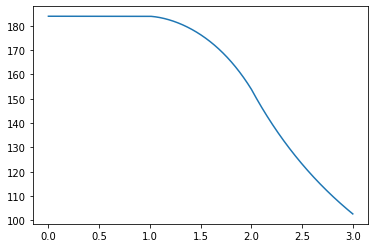

In [110]:
plt.plot(r_linspace,DPTS.V(r_linspace))

<string>:2: RuntimeWarning: invalid value encountered in double_scalars


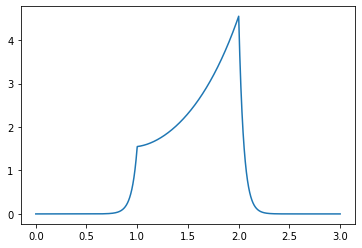

In [111]:
plt.plot(r_linspace,DPTS.Vprime(r_linspace))

In [112]:
DPTS.s1

2.9174447237881607

In [113]:
DPTS.Q

3868.8755785413205

## Numerically Test Conductor Equation

We want to test numerically that in the bulk, the conductor equation is satisfied. Here, we want to see that the sum of the derivative is 0 between R=1 and R=2. i.e. $\nabla V + \epsilon \nabla V' = 0$

In [114]:
gradV = np.gradient(DPTS.V(r_linspace),dr)
gradVprime = np.gradient(DPTS.Vprime(r_linspace),dr)

<string>:2: RuntimeWarning: invalid value encountered in double_scalars


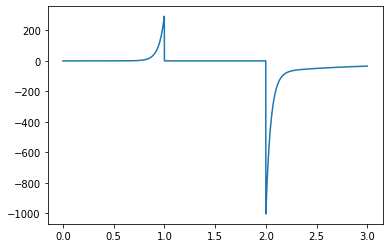

In [115]:
plt.plot(r_linspace,gradV + epsilon*gradVprime)

## Numerically Test Equation of Motion

We want to check $\nabla^2 V = - \rho_{EM}$.

In [116]:
lapV = np.gradient(gradV,dr) + (2/r_linspace)*gradV
lapV[0] = 0

C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


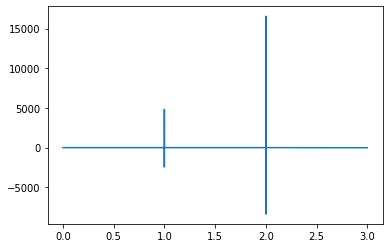

In [117]:
plt.plot(r_linspace,lapV+DPTS.rho_EM(r_linspace,dr))

We want to check $(\nabla^2 - m_{\gamma'}^2) V' = - \epsilon \rho_{EM}$.

In [118]:
lapVprime = np.gradient(gradVprime,dr) + (2/r_linspace)*gradVprime

C:\Users\samue\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<string>:2: RuntimeWarning: invalid value encountered in double_scalars


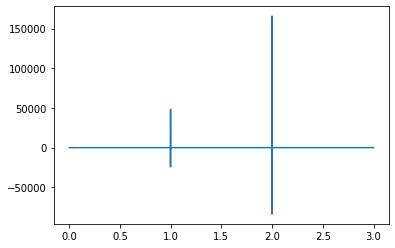

In [119]:
plt.plot(r_linspace,lapVprime - m**2 * DPTS.Vprime(r_linspace) + epsilon * DPTS.rho_EM(r_linspace,dr))

Text(0.5, 1.0, '$\\rho_{EM}$')

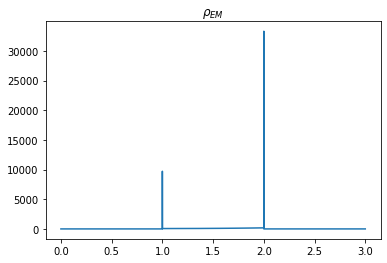

In [120]:
plt.plot(r_linspace,DPTS.rho_EM(r_linspace,dr))
plt.title(r"$\rho_{EM}$")

Everything works so far except for the surface charge. A direct test would be the cancellation, but unfortuantely this is not happening due to numerics. Let's try an indirect test by checking 
$$ \Delta \frac{dV}{dr} = -\sigma $$
$$ \Delta \frac{dV'}{dr} = -\epsilon \sigma $$

In [141]:
for i in range(3332,3336):
    print(gradVprime[i])

29.298393958603537
14.837355422280556
0.2934116268938334
0.29507807957887255


In [142]:
0.2934-29.298

-29.0046

In [144]:
-DPTS.epsilon*DPTS.s1

-29.17444723788161

$\Delta \frac{dV'}{dr}$ and $-\epsilon \sigma_1$ match.

In [143]:
for i in range(6664,6668):
    print(gradVprime[i])

6.690089331584573
6.693485674099283
-43.16070714888306
-92.73125378322985


In [146]:
-92.731-6.69

-99.42099999999999

In [148]:
-DPTS.epsilon*DPTS.s2

-100

In [134]:
for i in range(3331,3336):
    print(gradV[i])

0.0
0.0
-1.4628909506660503
-2.9341162689516547
-2.9507807957828045


In [150]:
-2.934-0

-2.934

In [147]:
-DPTS.s1

-2.9174447237881607

In [136]:
for i in range(6664,6668):
    print(gradV[i])

-66.90089331584574
-66.93485674100468
-71.95456597084004
-76.94574803351773


In [139]:
-76.9457-(-66.9348567)

-10.010843300000005

In [149]:
-DPTS.s2

-10

So we conclude that the discontinuity actually do match the theoretical surface charge, but somehow the numerical derivative have the jump spreaded through 2 points, so it doesn't cancel the delta function pointwise in the graph.

## Test Formula for Charge

In [152]:
from scipy.integrate import trapz

In [167]:
trapz(y=(r_linspace**2)*DPTS.rho_EM(r_linspace,dr),dx=dr)*4*np.pi

3852.58862409793

In [164]:
DPTS.Q

3868.8755785413205